# Notebook 4: SVM Utilizando la Función de Pérdida (Hinge Loss)

El SVM puede ser implementado como un problema de optimización que minimiza la función de pérdida hinge loss.

### Función de Pérdida Hinge Loss

La función de pérdida hinge loss es una función de pérdida que se utiliza en el entrenamiento de clasificadores de máquinas de vectores de soporte. La función de pérdida hinge loss se define como:

\begin{equation}
L(w, b) = \frac{1}{2}||w||^2 + C \sum_{i=1}^{n} max(0, 1 - y_i(w^Tx_i + b))
\end{equation}

Donde 𝐶 es un hiperparámetro que controla la penalización por errores.

### Importación de Librerías

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

### Implementación del SVM con Hinge Loss

Usaremos un optimizador como Gradient Descent para minimizar la función de pérdida.

In [51]:
def svm_sgd(X, y, C=1.0, epochs=1000, learning_rate=0.001):
    N, D = X.shape
    w = np.zeros(D)
    b = 0
    losses = []
    
    for epoch in range(1, epochs + 1):
        loss = 0
        for i in range(N):
            condition = y[i] * (np.dot(w, X[i]) + b)
            if condition >= 1:
                w_grad = w
                b_grad = 0
                loss += 0
            else:
                w_grad = w - C * y[i] * X[i]
                b_grad = -C * y[i]
                loss += 1 - condition
            w = w - learning_rate * w_grad
            b = b - learning_rate * b_grad
        loss = 0.5 * np.dot(w, w) + C * loss
        losses.append(loss)
    return w, b, losses

def svm_predict(X, w, b):
    return np.sign(np.dot(X, w) + b)


In [52]:
def cross_validate_svm(X, y, C_values, k_folds=5, epochs=100, learning_rate=0.001):
    kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)
    mean_accuracies = []
    std_accuracies = []
    
    for C in C_values:
        accuracies = []
        for train_index, val_index in kf.split(X):
            X_train, X_val = X[train_index], X[val_index]
            y_train, y_val = y[train_index], y[val_index]
            w, b, _ = svm_sgd(X_train, y_train, C=C, epochs=epochs, learning_rate=learning_rate)
            y_pred = svm_predict(X_val, w, b)
            accuracy = accuracy_score(y_val, y_pred)
            accuracies.append(accuracy)
        mean_accuracy = np.mean(accuracies)
        std_accuracy = np.std(accuracies)
        mean_accuracies.append(mean_accuracy)
        std_accuracies.append(std_accuracy)
        print(f'C = {C}: Mean Accuracy = {mean_accuracy:.4f}, Std = {std_accuracy:.4f}')
    return mean_accuracies, std_accuracies


### Entrenamiento del SVM con Hinge Loss en Ambos Conjuntos

**Conjunto Linealmente Separable**

In [53]:
np.random.seed(42)
N = 50
X_pos = np.random.randn(N, 2) + [1.4, 1.4]
X_neg = np.random.randn(N, 2) + [-1.4, -1.4]
X_ls = np.vstack((X_pos, X_neg))
y_ls = np.hstack((np.ones(N), -np.ones(N)))

In [54]:
C_fixed = 1
learning_rates = [0.0001, 0.001, 0.01, 0.1, 1]
mean_accuracies_lr_ls, std_accuracies_lr_ls = cross_validate_svm_learning_rates(X_ls, y_ls, C=C_fixed, learning_rates=learning_rates, k_folds=30, epochs=100)

Learning Rate = 0.0001: Mean Accuracy = 1.0000, Std = 0.0000
Learning Rate = 0.001: Mean Accuracy = 1.0000, Std = 0.0000
Learning Rate = 0.01: Mean Accuracy = 1.0000, Std = 0.0000
Learning Rate = 0.1: Mean Accuracy = 0.5083, Std = 0.2913
Learning Rate = 1: Mean Accuracy = 0.5083, Std = 0.2913


### Graficar la Precisión vs. Tasa de Aprendizaje

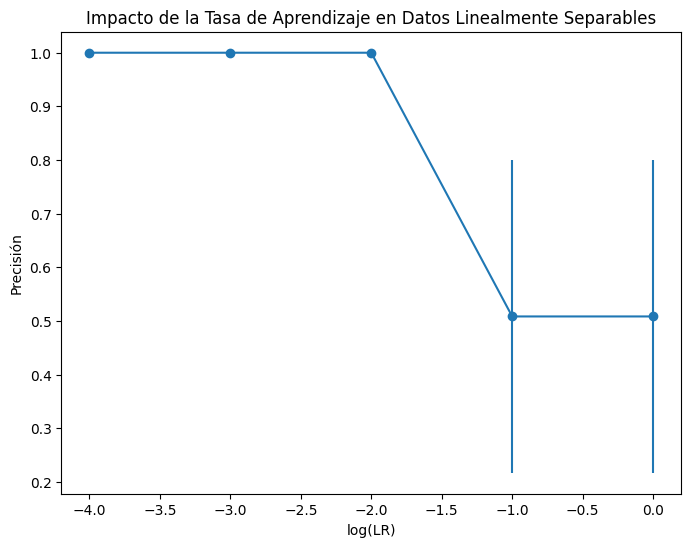

In [55]:
plt.figure(figsize=(8, 6))
plt.errorbar(np.log10(learning_rates), mean_accuracies_lr_ls, yerr=std_accuracies_lr_ls, fmt='-o')
plt.xlabel('log(LR)')
plt.ylabel('Precisión')
plt.title('Impacto de la Tasa de Aprendizaje en Datos Linealmente Separables')
plt.show()

### Gráfica del Hiperplano

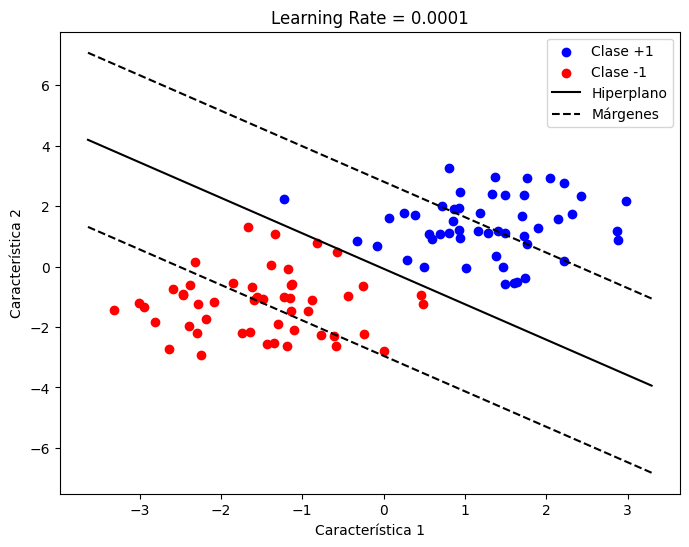

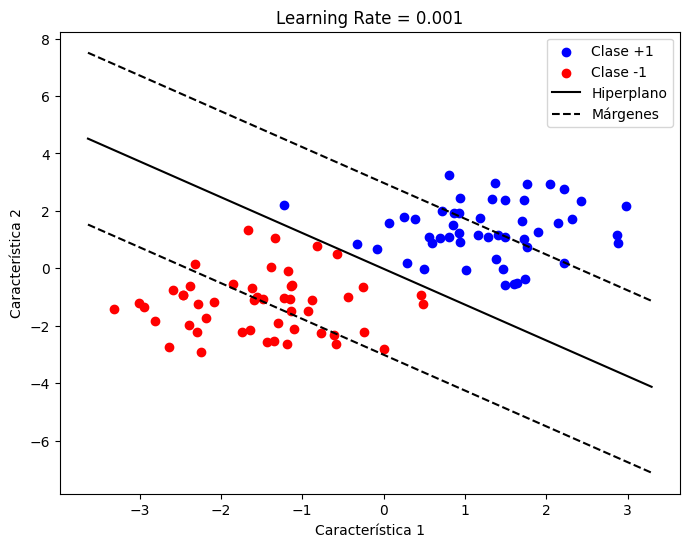

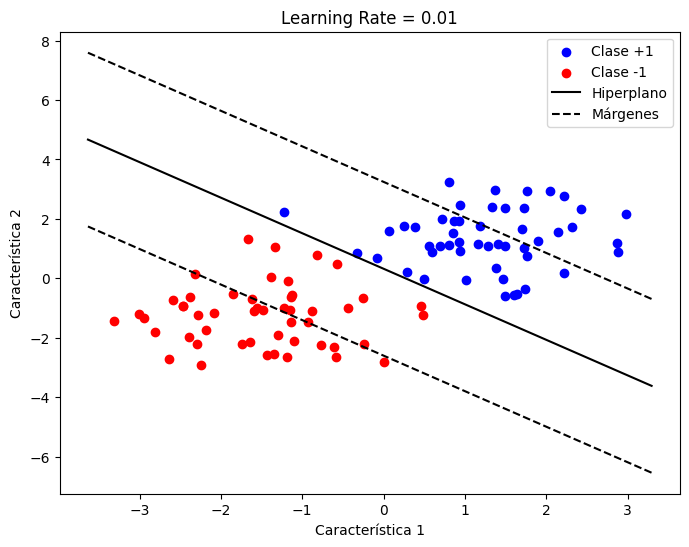

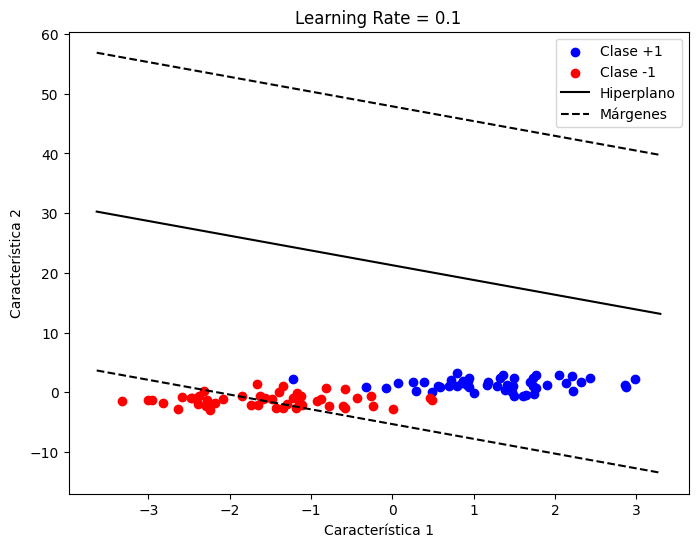

C:\Users\Tomas\AppData\Local\Temp\ipykernel_9244\3714911426.py:8: RuntimeWarning: divide by zero encountered in divide
  yy = -(w[0] * xx + b) / w[1]
C:\Users\Tomas\AppData\Local\Temp\ipykernel_9244\3714911426.py:9: RuntimeWarning: divide by zero encountered in scalar divide
  margin = 1 / np.linalg.norm(w)
C:\Users\Tomas\AppData\Local\Temp\ipykernel_9244\3714911426.py:10: RuntimeWarning: invalid value encountered in scalar divide
  yy_down = yy - np.sqrt(1 + (w[0]/w[1])**2) * margin
C:\Users\Tomas\AppData\Local\Temp\ipykernel_9244\3714911426.py:11: RuntimeWarning: invalid value encountered in scalar divide
  yy_up = yy + np.sqrt(1 + (w[0]/w[1])**2) * margin


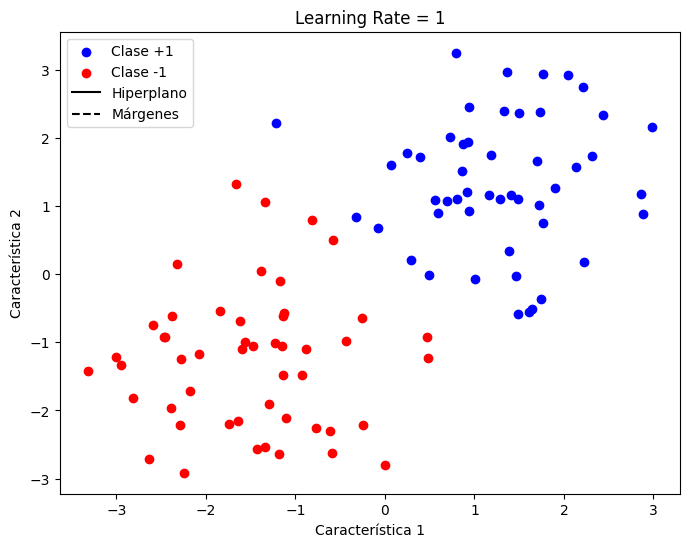

In [56]:
def plot_svm_decision_boundary(X, y, w, b, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Clase +1')
    plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color='red', label='Clase -1')
    
    x_min, x_max = plt.xlim()
    xx = np.linspace(x_min, x_max, 100)
    yy = -(w[0] * xx + b) / w[1]
    margin = 1 / np.linalg.norm(w)
    yy_down = yy - np.sqrt(1 + (w[0]/w[1])**2) * margin
    yy_up = yy + np.sqrt(1 + (w[0]/w[1])**2) * margin
    
    plt.plot(xx, yy, 'k-', label='Hiperplano')
    plt.plot(xx, yy_down, 'k--', label='Márgenes')
    plt.plot(xx, yy_up, 'k--')
    
    plt.title(title)
    plt.xlabel('Característica 1')
    plt.ylabel('Característica 2')
    plt.legend()
    plt.show()

for learning_rate in learning_rates:
    w, b, _ = svm_sgd(X_ls, y_ls, C=C_fixed, epochs=100, learning_rate=learning_rate)
    plot_svm_decision_boundary(X_ls, y_ls, w, b, f'Learning Rate = {learning_rate}')


**Conjunto con Outliers y Ruido**

In [57]:
np.random.seed(42)
N = 50
X_pos = np.random.randn(N, 2) + [2, 2]
X_neg = np.random.randn(N, 2) + [-2, -2]
X_ns = np.vstack((X_pos, X_neg))
y_ns = np.hstack((np.ones(N), -np.ones(N)))

# Agregar outliers
M = 10  
outliers_pos = np.random.randn(M, 2) + [-2, -2]
outliers_neg = np.random.randn(M, 2) + [2, 2]
X_outliers = np.vstack((outliers_pos, outliers_neg))
y_outliers = np.hstack((np.ones(M), -np.ones(M)))

# Datos finales
X_ns = np.vstack((X_ns, X_outliers))
y_ns = np.hstack((y_ns, y_outliers))


In [58]:
C_values = [0.01, 0.1, 1, 10, 100]
learning_rates = [0.0001, 0.001, 0.01, 0.1, 1]

means = []
stds = []
for lr in learning_rates:
    mean_accuracies, std_accuracies = cross_validate_svm(X_ns, y_ns, C_values, k_folds=30, epochs=100, learning_rate=lr)
    means.append(mean_accuracies)
    stds.append(std_accuracies)

C = 0.01: Mean Accuracy = 0.8417, Std = 0.1512
C = 0.1: Mean Accuracy = 0.8417, Std = 0.1512
C = 1: Mean Accuracy = 0.8417, Std = 0.1512
C = 10: Mean Accuracy = 0.8417, Std = 0.1512
C = 100: Mean Accuracy = 0.8083, Std = 0.1669
C = 0.01: Mean Accuracy = 0.8417, Std = 0.1512
C = 0.1: Mean Accuracy = 0.8417, Std = 0.1512
C = 1: Mean Accuracy = 0.8417, Std = 0.1512
C = 10: Mean Accuracy = 0.8083, Std = 0.1669
C = 100: Mean Accuracy = 0.1583, Std = 0.1644
C = 0.01: Mean Accuracy = 0.7667, Std = 0.2409
C = 0.1: Mean Accuracy = 0.8083, Std = 0.1789
C = 1: Mean Accuracy = 0.5000, Std = 0.2236
C = 10: Mean Accuracy = 0.1667, Std = 0.1624
C = 100: Mean Accuracy = 0.1583, Std = 0.1644
C = 0.01: Mean Accuracy = 0.1917, Std = 0.1239
C = 0.1: Mean Accuracy = 0.1667, Std = 0.1624
C = 1: Mean Accuracy = 0.1583, Std = 0.1512
C = 10: Mean Accuracy = 0.1583, Std = 0.1512
C = 100: Mean Accuracy = 0.1583, Std = 0.1512
C = 0.01: Mean Accuracy = 0.1917, Std = 0.1239
C = 0.1: Mean Accuracy = 0.4750, Std = 0.

### Gráfica de Precisión vs. 𝐶 por LR

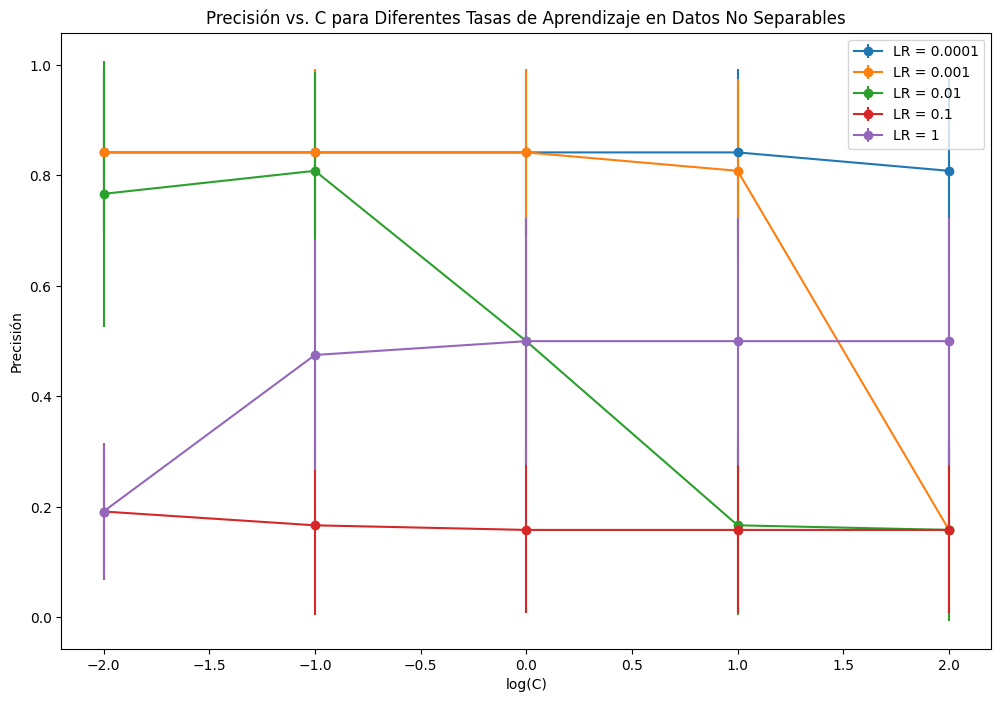

Learning Rate = 0.0001, C = 0.01: Accuracy = 0.8417 ± 0.1512
Learning Rate = 0.0001, C = 0.1: Accuracy = 0.8417 ± 0.1512
Learning Rate = 0.0001, C = 1: Accuracy = 0.8417 ± 0.1512
Learning Rate = 0.0001, C = 10: Accuracy = 0.8417 ± 0.1512
Learning Rate = 0.0001, C = 100: Accuracy = 0.8083 ± 0.1669
Learning Rate = 0.001, C = 0.01: Accuracy = 0.8417 ± 0.1512
Learning Rate = 0.001, C = 0.1: Accuracy = 0.8417 ± 0.1512
Learning Rate = 0.001, C = 1: Accuracy = 0.8417 ± 0.1512
Learning Rate = 0.001, C = 10: Accuracy = 0.8083 ± 0.1669
Learning Rate = 0.001, C = 100: Accuracy = 0.1583 ± 0.1644
Learning Rate = 0.01, C = 0.01: Accuracy = 0.7667 ± 0.2409
Learning Rate = 0.01, C = 0.1: Accuracy = 0.8083 ± 0.1789
Learning Rate = 0.01, C = 1: Accuracy = 0.5000 ± 0.2236
Learning Rate = 0.01, C = 10: Accuracy = 0.1667 ± 0.1624
Learning Rate = 0.01, C = 100: Accuracy = 0.1583 ± 0.1644
Learning Rate = 0.1, C = 0.01: Accuracy = 0.1917 ± 0.1239
Learning Rate = 0.1, C = 0.1: Accuracy = 0.1667 ± 0.1624
Learni

In [59]:
plt.figure(figsize=(12, 8))
for i, lr in enumerate(learning_rates):
  plt.errorbar(np.log10(C_values), means[i], yerr=stds[i], label=f'LR = {lr}', fmt='-o')

plt.xlabel('log(C)')
plt.ylabel('Precisión')
plt.title('Precisión vs. C para Diferentes Tasas de Aprendizaje en Datos No Separables')
plt.legend()
plt.show()

# check best pair of C and learning rate
for i, lr in enumerate(learning_rates):
    for c in range(len(C_values)):
        print(f'Learning Rate = {lr}, C = {C_values[c]}: Accuracy = {means[i][c]:.4f} ± {stds[i][c]:.4f}')


### Gráfica del Hiperplano

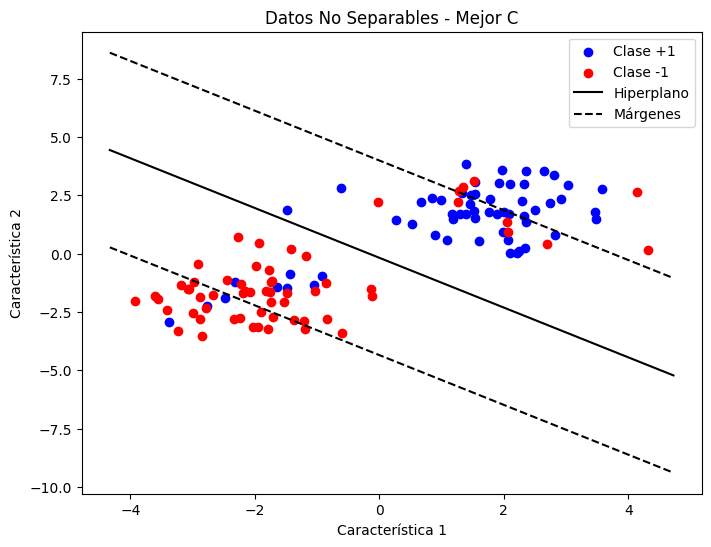

In [63]:
w_ns, b_ns, losses_ns = svm_sgd(X_ns, y_ns, C=1, epochs=100, learning_rate=0.001)
plot_svm_decision_boundary(X_ns, y_ns, w_ns, b_ns, f'Datos No Separables - Mejor C')